1. Intensity Transformation

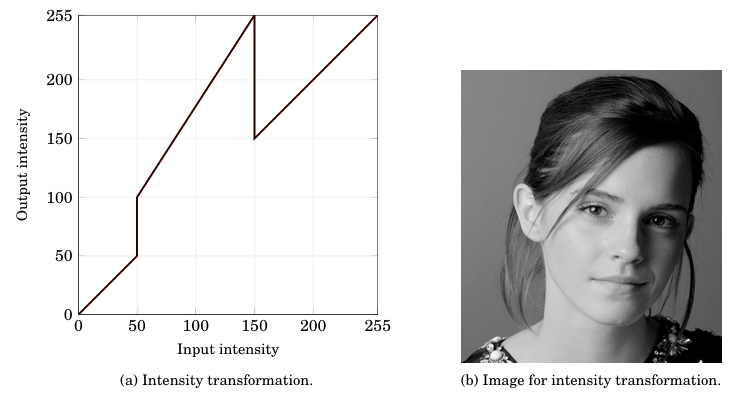

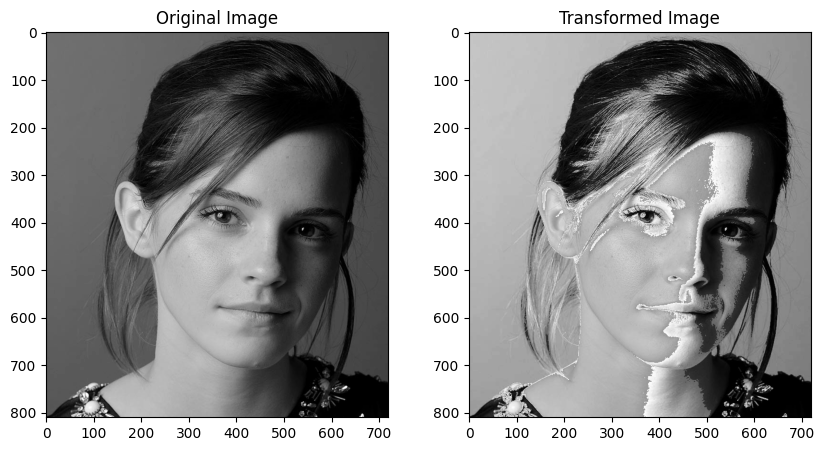

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images\\emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation
def intensity_transform(pixel):
    if 0 <= pixel < 50:
        return int(pixel)
    elif 50 <= pixel < 150:
        return int(1.55 * pixel + 22.5)
    elif 150 <= pixel < 255:
        return int(pixel)
    else:
        return 0
    
    

# Vectorize the transformation function
vectorized_transform = np.vectorize(intensity_transform)

# Apply the transformation
transformed_image = vectorized_transform(img)

# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()



2. Identify Brain density


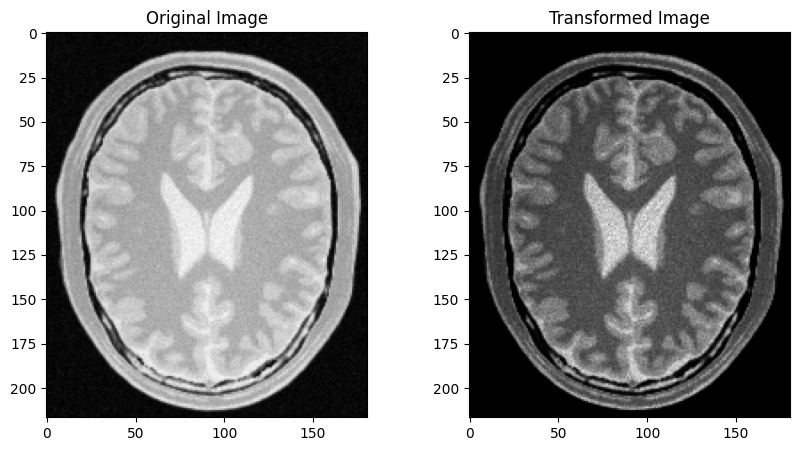

In [23]:
# open the brain_proton_density_slice.png image

img = cv.imread('a1images\\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation and identify the white matter and gray matter in the cell

# apply gamma correction
def gamma_correction(pixel, gamma):
    return int(255 * (pixel / 255) ** gamma)

# Vectorize the transformation function
vectorized_transform = np.vectorize(gamma_correction)

# Apply the transformation
transformed_image = vectorized_transform(img, 3)


# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()

# Identify the white matter and gray matter in the cell

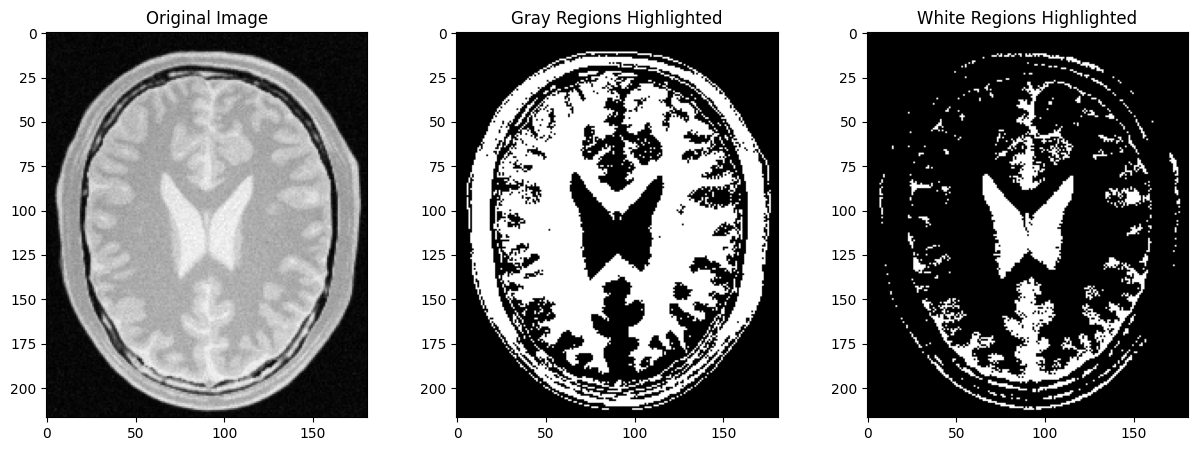

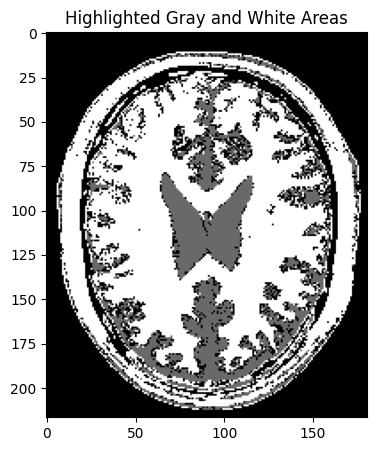

In [34]:
# Highlight gray region (Intensity range: 100-180)
gray_mask = cv.inRange(img, 100, 190)

# Highlight white region (Intensity range: 200-255)
white_mask = cv.inRange(img, 200, 255)

# Create a highlighted image with different colors for gray and white
highlighted_image = np.zeros_like(img)
highlighted_image[gray_mask > 0] = 240  # Set gray regions to a lighter shade
highlighted_image[white_mask > 0] = 100  # Set white regions to full intensity (white)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gray Regions Highlighted')
plt.imshow(gray_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('White Regions Highlighted')
plt.imshow(white_mask, cmap='gray')

plt.show()

# Combine both masks and display the highlighted image
plt.figure(figsize=(10, 5))
plt.title('Highlighted Gray and White Areas')
plt.imshow(highlighted_image, cmap='gray')
plt.show()

3. Gamma Correction

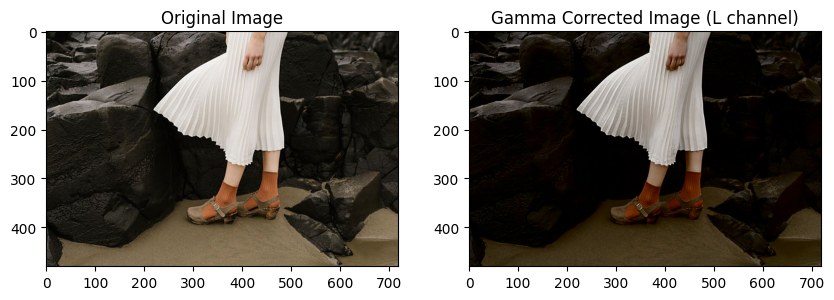

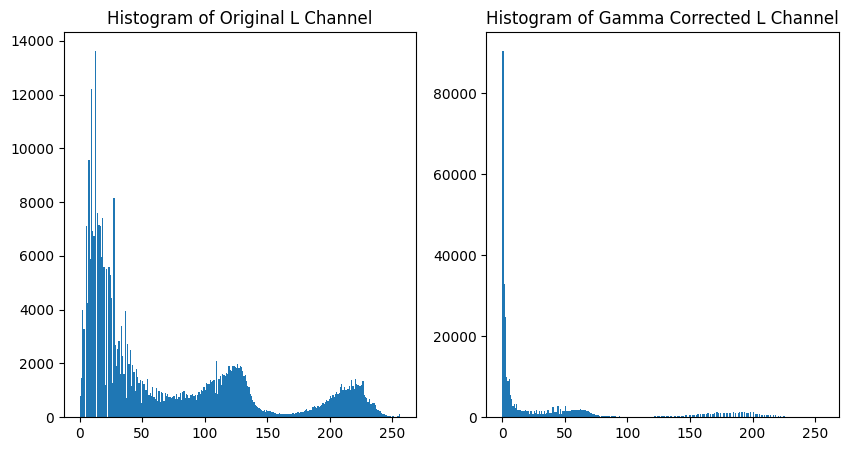

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('a1images\\highlights_and_shadows.jpg')  # Replace with the correct image path
assert img is not None

# Convert the image from BGR to Lab color space
lab_image = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Split the channels
L, a, b = cv.split(lab_image)

# Normalize the L channel to [0,1] for gamma correction
L_normalized = L / 255.0

# Gamma correction function
gamma = 2  # You can change the gamma value as needed
L_gamma_corrected = np.power(L_normalized, gamma)

# Scale back to [0, 255]
L_gamma_corrected = np.uint8(L_gamma_corrected * 255)

# Merge the corrected L channel back with original a and b channels
lab_corrected = cv.merge((L_gamma_corrected, a, b))

# Convert back to BGR color space for visualization
corrected_img = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)

# Display the original and corrected images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Convert to RGB for display

plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image (L channel)')
plt.imshow(cv.cvtColor(corrected_img, cv.COLOR_BGR2RGB))  # Convert to RGB for display

plt.show()

# Plot the histograms of original and corrected L channels
plt.figure(figsize=(10,5))

# Histogram of the original L channel
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Original L Channel')

# Histogram of the gamma corrected L channel
plt.subplot(1, 2, 2)
plt.hist(L_gamma_corrected.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Gamma Corrected L Channel')

plt.show()


4.

In [35]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('a1images/spider.png')  # Replace with your image path
assert img is not None

# Convert the image to HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV channels
H, S, V = cv.split(hsv_img)

# Function to apply the intensity transformation to the saturation plane
def intensity_transformation(S, a=0.5, sigma=70):
    S = S.astype(np.float32)
    transformed = S + a * 128 * np.exp(-((S - 128) ** 2) / (2 * (sigma ** 2)))
    transformed = np.minimum(transformed, 255)  # Clip to 255
    return transformed.astype(np.uint8)

# Function to update the vibrance enhanced image based on the trackbar value
def update_vibrance(val):
    a = val / 100  # Scale the trackbar value to a range of [0, 1]
    S_transformed = intensity_transformation(S, a=a)
    
    # Recombine the HSV channels with the modified saturation plane
    hsv_transformed = cv.merge([H, S_transformed, V])
    
    # Convert the transformed HSV image back to BGR color space for visualization
    vibrance_enhanced_img = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)
    
    # Show the vibrance enhanced image
    cv.imshow('Vibrance Enhanced Image', vibrance_enhanced_img)

# Create a window to display the image
cv.namedWindow('Vibrance Enhanced Image')

# Create a trackbar to adjust the 'a' value (0 to 100)
cv.createTrackbar('a', 'Vibrance Enhanced Image', 50, 100, update_vibrance)

# Call the update_vibrance function initially to display the image
update_vibrance(50)

# Wait for the user to press a key
cv.waitKey(0)
cv.destroyAllWindows()


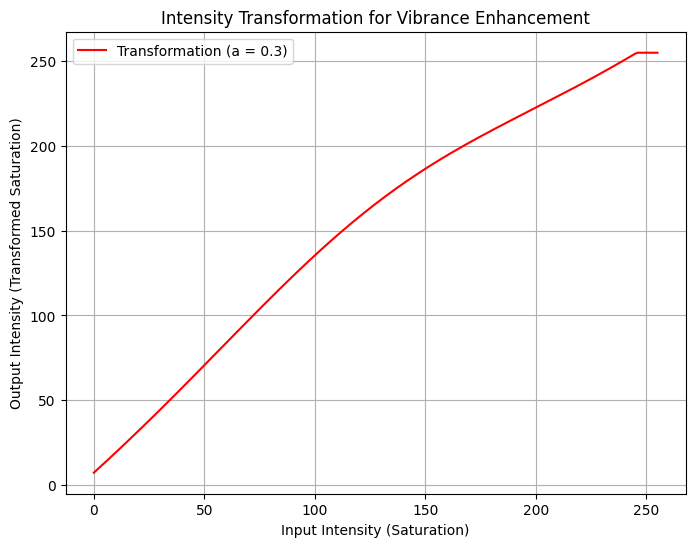

In [18]:
# Create input intensity values (range of possible saturation values)
x_values = np.arange(0, 256, 1, dtype=np.float32)

# Apply the vibrance enhancement transformation for the intensity values
sigma = 70
a = 0.3  # Amplification factor
transformation_values = x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2))
transformation_values = np.clip(transformation_values, 0, 255)  # Clip values to the range [0, 255]

# Plot the original intensity vs the transformed intensity
plt.figure(figsize=(8, 6))
plt.plot(x_values, transformation_values, color='r', label=f'Transformation (a = {a})')
plt.xlabel('Input Intensity (Saturation)')
plt.ylabel('Output Intensity (Transformed Saturation)')
plt.title('Intensity Transformation for Vibrance Enhancement')
plt.grid(True)
plt.legend()
plt.show()

5. Histogram Equalization

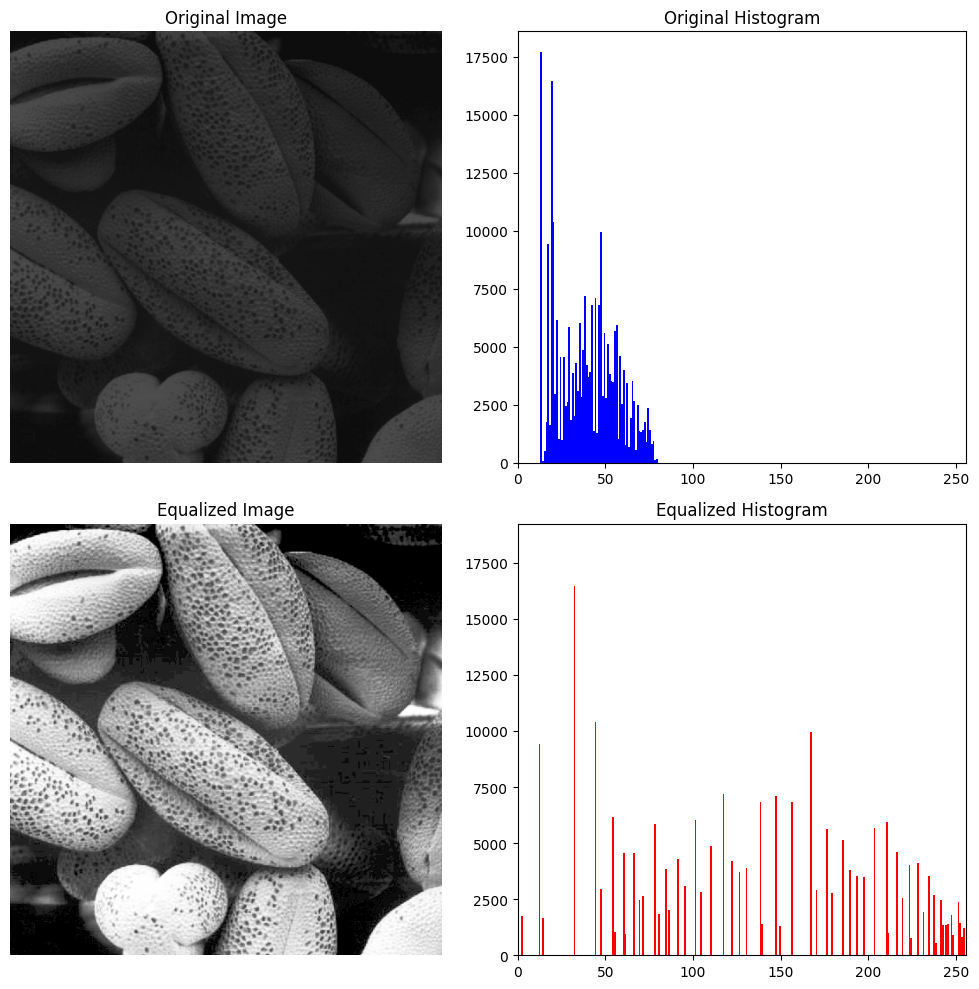

In [46]:
def histogram_equalization(image):
    # Convert image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Get image dimensions
    h, w = gray_image.shape
    
    # Calculate the histogram
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Apply histogram equalization
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the cdf
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0

    # Use the CDF to map the old pixel values to the new values
    equalized_image = cdf[gray_image]

    return gray_image, equalized_image, hist, cdf_normalized

# Load the image (replace 'image_path' with the correct path to your image)
image = cv.imread('a1images/shells.tif')

# Perform histogram equalization
gray_image, equalized_image, hist, cdf_normalized = histogram_equalization(image)

# Plot the original and equalized images
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image and histogram
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].hist(gray_image.flatten(), 256, [0, 256], color='blue')
ax[0, 1].set_title("Original Histogram")
ax[0, 1].set_xlim([0, 256])

# Display the equalized image and histogram
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title("Equalized Image")
ax[1, 0].axis('off')

ax[1, 1].hist(equalized_image.flatten(), 256, [0, 256], color='red')
ax[1, 1].set_title("Equalized Histogram")
ax[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()

6. Loading and converting HSV

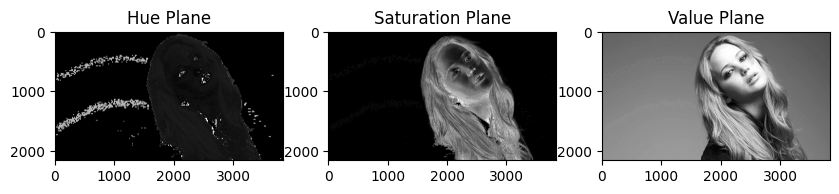

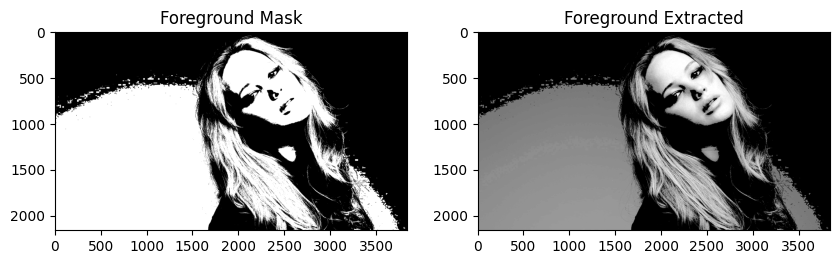

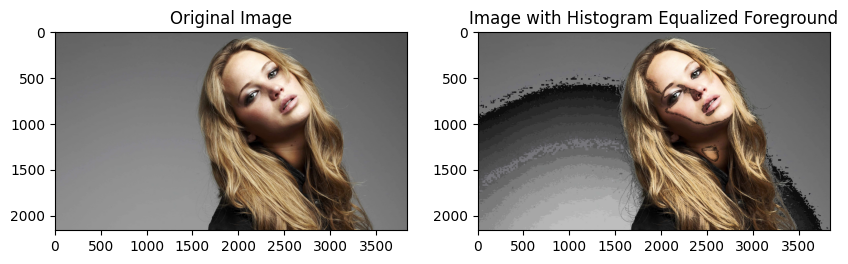

In [5]:
# Step (a): Load the image and convert to HSV
image = cv.imread('a1images/jeniffer.jpg')  # Load your image here
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV channels
hue, saturation, value = cv.split(hsv_image)

# Display the H, S, V planes in grayscale
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.show()

# Step (b): Threshold the 'Value' plane to create a binary mask for foreground
_, mask = cv.threshold(value, 120, 255, cv.THRESH_BINARY)

# Step (c): Extract the foreground using cv.bitwise_and
foreground = cv.bitwise_and(value, value, mask=mask)

# Display the mask and foreground
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.subplot(122)
plt.imshow(foreground, cmap='gray')
plt.title('Foreground Extracted')
plt.show()

# Step (d): Compute the histogram of the foreground
hist, bins = np.histogram(foreground.flatten(), 256, [0, 256])

# Step (e): Compute the cumulative sum (CDF) of the histogram
cdf = hist.cumsum()

# Normalize the CDF
cdf_normalized = cdf * hist.max() / cdf.max()

# Mask zero values to avoid dividing by zero
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Histogram equalization formula
cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill with 0s

# Apply the CDF to the foreground to equalize it
equalized_foreground = cdf[foreground]

# Step (f): Combine the histogram-equalized foreground with the original background
background = cv.bitwise_and(value, value, mask=cv.bitwise_not(mask))
final_value_plane = cv.add(background, equalized_foreground)

# Merge the channels back to form the final image
final_hsv_image = cv.merge([hue, saturation, final_value_plane])
final_image = cv.cvtColor(final_hsv_image, cv.COLOR_HSV2BGR)

# Show the original and final images
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.title('Image with Histogram Equalized Foreground')
plt.show()

7. Sobel Filtering

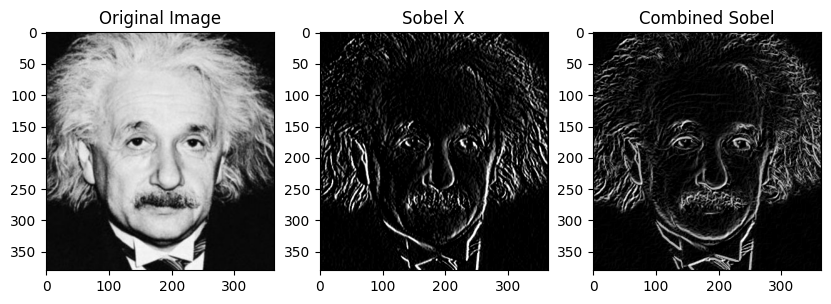

In [14]:
image = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Sobel kernels
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply filter2D with Sobel kernels
sobel_x_image = cv.filter2D(image, -1, sobel_x)
sobel_y_image = cv.filter2D(image, -1, sobel_y)

# Combine horizontal and vertical gradients
sobel_combined = cv.magnitude(sobel_x_image.astype(np.float32), sobel_y_image.astype(np.float32))

# Display the results
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(sobel_x_image, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
plt.show()

8. Zoom the image

Normalized SSD (Nearest Neighbor): 136.2690534979424
Normalized SSD (Bilinear): 115.09185185185186


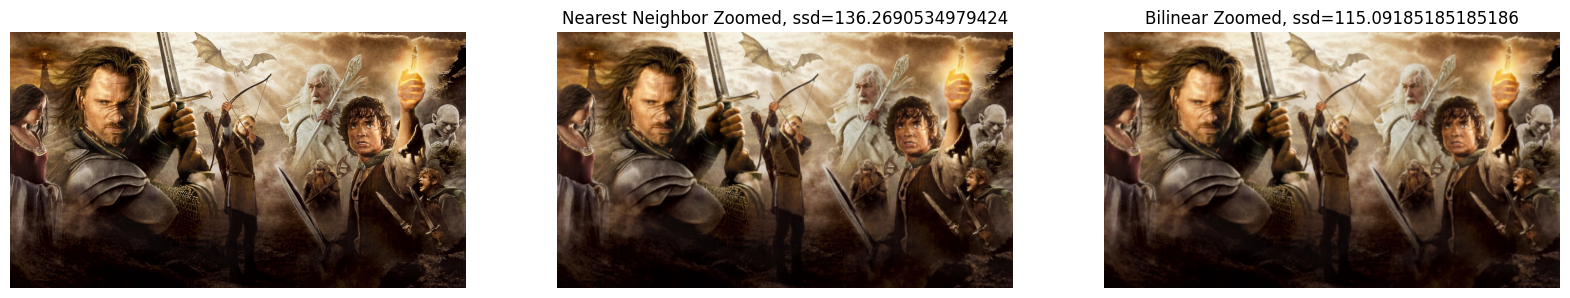

In [43]:
# Import required libraries
import cv2 
import numpy as np
from matplotlib import pyplot as plt

# Function to zoom the image
def zoom_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=interpolation)

# Function to compute normalized SSD between two images
def compute_normalized_ssd(img1, img2, bypass_size_error=True):
    if not bypass_size_error:
        # Ensure images are of the same size
        assert img1.shape == img2.shape, "Images must be the same shape for SSD computation."
    else: 
        # Crop the larger image to match the smaller image
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])

        img1 = img1[:min_height, :min_width]
        img2 = img2[:min_height, :min_width]

    
    
    # Compute the sum of squared differences
    ssd = np.sum((img1.astype("float32") - img2.astype("float32")) ** 2)
    
    # Normalize by the number of pixels
    norm_ssd = ssd / np.prod(img1.shape)
    
    return norm_ssd

# Function to display images side-by-side
def display_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(20, 15))

    # Original image
    # plt.subplot(2, 2)
    # plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    # plt.title(titles[0])
    # plt.axis('off')

    # # Nearest-neighbor zoomed image
    # plt.subplot(3, 1, 2)
    # plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    # plt.title(titles[1])
    # plt.axis('off')

    # # Bilinear zoomed image
    # plt.subplot(3,1, 3)
    # plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    # plt.title(titles[2])
    # plt.axis('off')

    # plt.show()

    # plot the images two columns
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    # plt.title(titles[0])
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.show()


def get_zoom_and_orignal_img(small_img, big_img, scale_factor=4, bypass_size_error=True):
        # Scale factor
    scale_factor = 4

    # Zoom using nearest-neighbor interpolation
    zoomed_nn = zoom_image(small_img, scale_factor, cv2.INTER_NEAREST)

    # Zoom using bilinear interpolation
    zoomed_bilinear = zoom_image(small_img, scale_factor, cv2.INTER_LINEAR)

    # Compute normalized SSD for nearest-neighbor zoomed image
    ssd_nn = compute_normalized_ssd(big_img, zoomed_nn, bypass_size_error=bypass_size_error)

    # Compute normalized SSD for bilinear zoomed image
    ssd_bilinear = compute_normalized_ssd(big_img, zoomed_bilinear, bypass_size_error=bypass_size_error)

    # Print out SSD values
    print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
    print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

    # Display the images
    titles = ["Original Image", f"Nearest Neighbor Zoomed, ssd={ssd_nn}", f"Bilinear Zoomed, ssd={ssd_bilinear}"]
    display_images(big_img, zoomed_nn, zoomed_bilinear, titles)


im01_small_img = cv2.imread("a1images/a1q5images/im01small.png")
im01_img = cv2.imread("a1images/a1q5images/im01.png")

im02_small_img = cv2.imread("a1images/a1q5images/im02small.png")
im02_img = cv2.imread("a1images/a1q5images/im02.png")

im03_small_img = cv2.imread("a1images/a1q5images/im03small.png")
im03_img = cv2.imread("a1images/a1q5images/im03.png")

taylor_very_small_img = cv2.imread("a1images/a1q5images/taylor_very_small.jpg")
taylor_small_img = cv2.imread("a1images/a1q5images/taylor_small.jpg")
taylor_img = cv2.imread("a1images/a1q5images/taylor.jpg")

get_zoom_and_orignal_img(small_img=im01_small_img, big_img=im01_img, scale_factor=4, bypass_size_error=False)

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 18.34591087962963


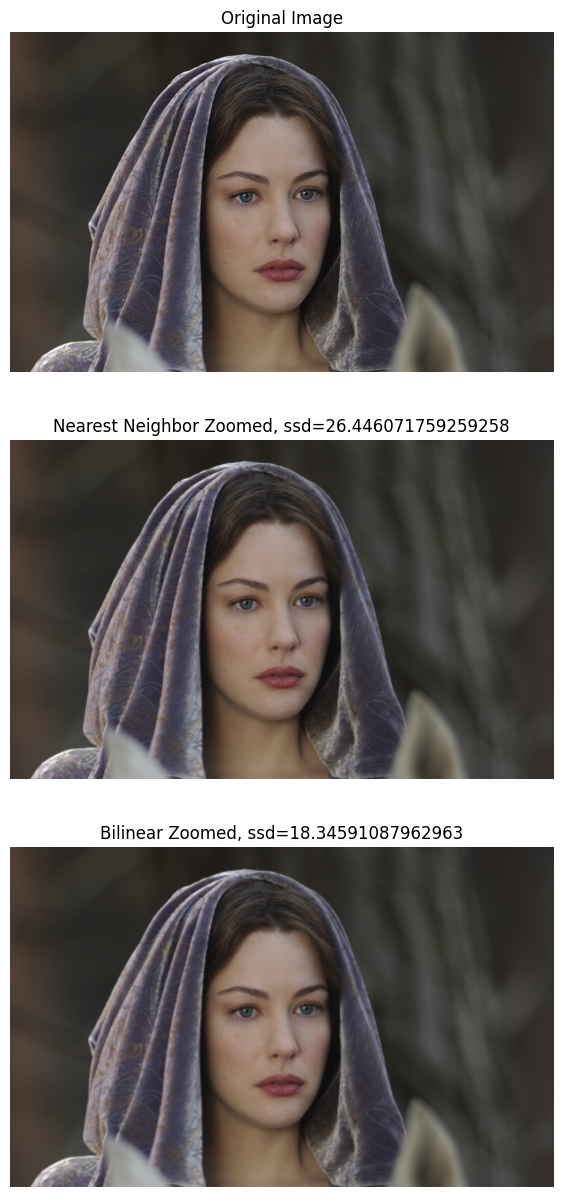

In [18]:
get_zoom_and_orignal_img(small_img=im02_small_img, big_img=im02_img, scale_factor=4, bypass_size_error=False)

Normalized SSD (Nearest Neighbor): 67.58167390145458
Normalized SSD (Bilinear): 51.20135861701318


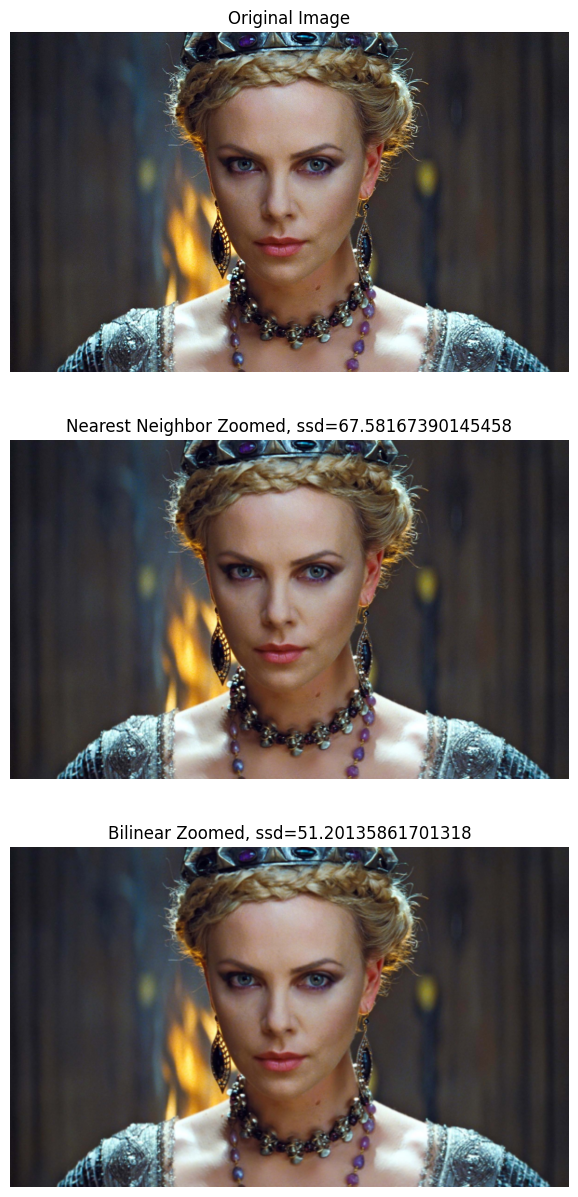

In [19]:
get_zoom_and_orignal_img(small_img=im03_small_img, big_img=im03_img, scale_factor=4, bypass_size_error=True)

9. 

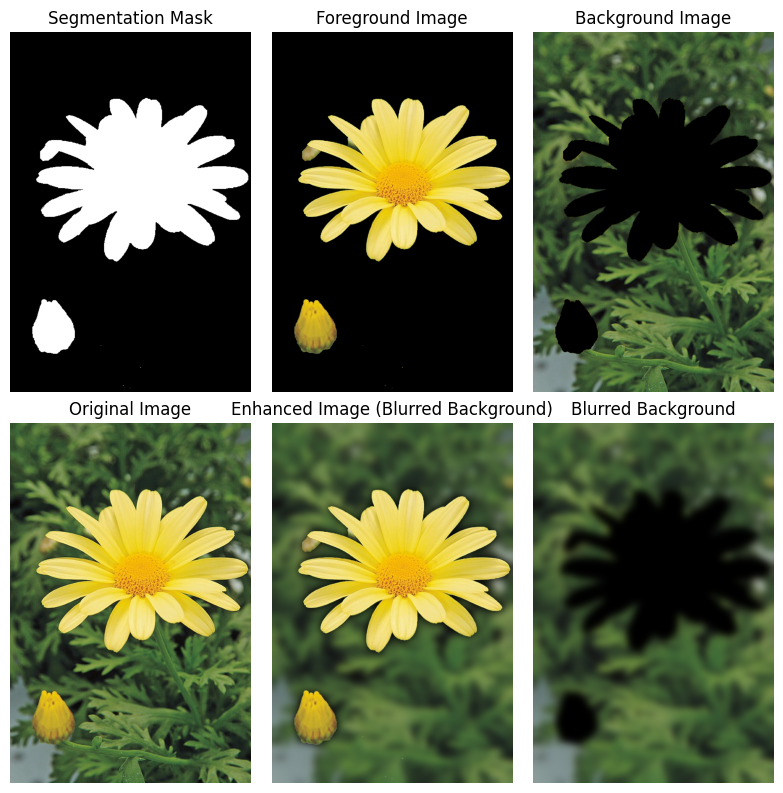

In [45]:
daisy_img = cv2.imread("a1images/daisy.jpg")

daisy_img_rgb = cv2.cvtColor(daisy_img, cv2.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(daisy_img.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle for the GrabCut algorithm
# The rectangle should enclose the object to be segmented (foreground).
rect = (50, 50, daisy_img.shape[1]-50, daisy_img.shape[0]-50)

# Apply the GrabCut algorithm
cv2.grabCut(daisy_img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask such that all probable foreground and definite foreground pixels are marked as foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the segmented foreground
foreground = daisy_img_rgb * mask2[:, :, np.newaxis]

# Extract the background (everything outside the foreground)
background = daisy_img_rgb * (1 - mask2[:, :, np.newaxis])


blurred_background = cv2.GaussianBlur(background, (55, 55), 0)

# Combine the sharp foreground with the blurred background
enhanced_image = np.where(mask2[:, :, np.newaxis] == 1, daisy_img_rgb, blurred_background)

# Original image blur
daisy_img_rgb_blurred = cv2.GaussianBlur(daisy_img_rgb, (55, 55), 0)

# Combine the sharp foreground with the blurred original
enhanced_image_new = np.where(mask2[:, :, np.newaxis] == 1, daisy_img_rgb, daisy_img_rgb_blurred)


# Import necessary libraries
import matplotlib.pyplot as plt

# Define the number of subplots and figure size
fig, ax = plt.subplots(2, 3, figsize=(8, 8))

# Plot the first row (Segmentation Mask, Foreground, Background)
ax[0, 0].imshow(mask2, cmap='gray')
ax[0, 0].set_title('Segmentation Mask')
ax[0, 0].axis('off')

ax[0, 1].imshow(foreground)
ax[0, 1].set_title('Foreground Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(background)
ax[0, 2].set_title('Background Image')
ax[0, 2].axis('off')

# Plot the second row (Original, Enhanced, and Blurred Background)
ax[1, 0].imshow(daisy_img_rgb)
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(enhanced_image)
ax[1, 1].set_title('Enhanced Image (Blurred Background)')
ax[1, 1].axis('off')

ax[1, 2].imshow(blurred_background)
ax[1, 2].set_title('Blurred Background')
ax[1, 2].axis('off')

# Show the combined plot
plt.tight_layout()
plt.show()
